In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Data
file_path = "coffe shop sales.xlsx"
data = pd.read_excel(file_path)


In [62]:
total_sales = data["Total Bill"].sum()
total_footfall = data["transaction_id"].nunique()
avg_bill_per_person = total_sales / total_footfall
avg_order_per_person = data["transaction_qty"].sum() / total_footfall

print("TOTAL SALES:", round(total_sales,2))
print("TOTAL FOOTFALL:", total_footfall)
print("AVG BILL / PERSON:", round(avg_bill_per_person,2))
print("AVG ORDERS / PERSON:", round(avg_order_per_person,2))


TOTAL SALES: 698812.33
TOTAL FOOTFALL: 149116
AVG BILL / PERSON: 4.69
AVG ORDERS / PERSON: 1.44


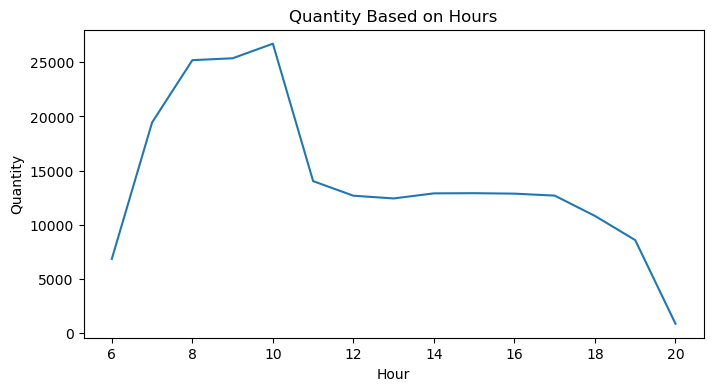

In [63]:
hourly_qty = data.groupby("Hour")["transaction_qty"].sum()

plt.figure(figsize=(8,4))
plt.plot(hourly_qty.index, hourly_qty.values)
plt.title("Quantity Based on Hours")
plt.xlabel("Hour")
plt.ylabel("Quantity")
plt.show()


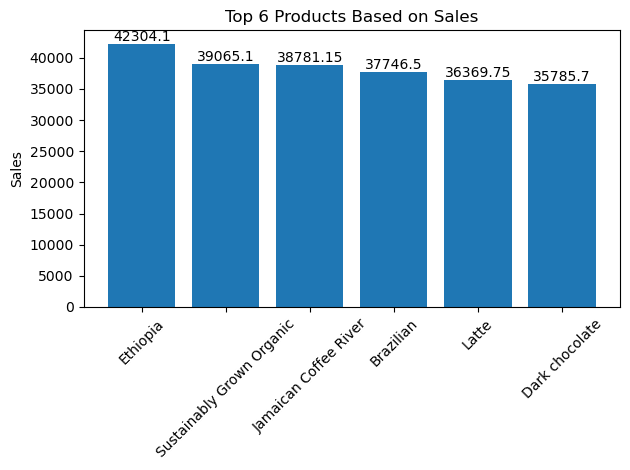

In [66]:
top_products = data.groupby("product_detail")["Total Bill"].sum().nlargest(6)

import matplotlib.pyplot as plt

plt.bar(top_products.index, top_products.values)
for i, v in enumerate(top_products.values):
    plt.text(i, v, round(v,2), ha='center', va='bottom')

plt.xticks(rotation=45)
plt.title("Top 6 Products Based on Sales")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()


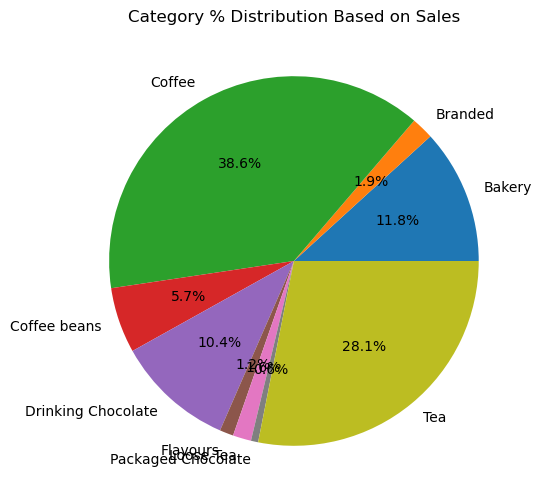

In [67]:
category_sales = data.groupby("product_category")["Total Bill"].sum()

plt.figure(figsize=(6,6))
plt.pie(category_sales.values, labels=category_sales.index, autopct="%1.1f%%")
plt.title("Category % Distribution Based on Sales")
plt.show()


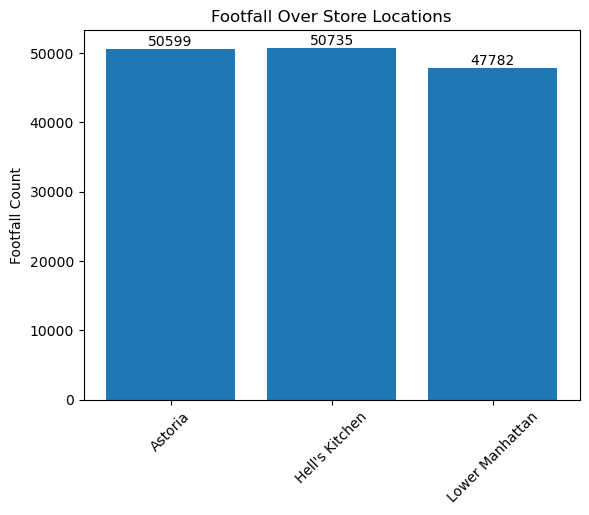

In [70]:
store_footfall = data.groupby("store_location")["transaction_id"].nunique()

plt.bar(store_footfall.index, store_footfall.values)

# add labels on bars
for x, y in zip(store_footfall.index, store_footfall.values):
    plt.text(x, y, str(y), ha='center', va='bottom')

plt.title("Footfall Over Store Locations")
plt.ylabel("Footfall Count")
plt.xticks(rotation=45)
plt.show()


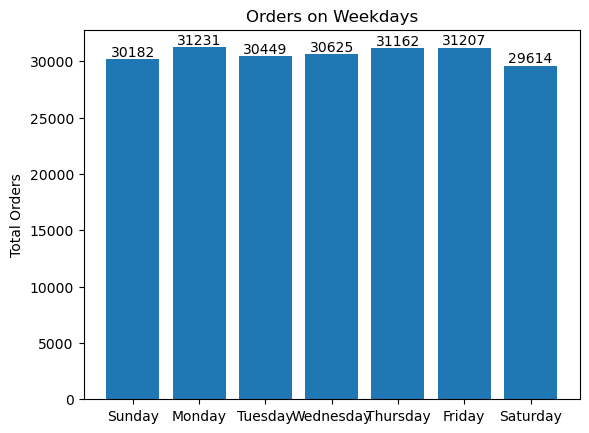

In [72]:
order = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]

weekday = data.groupby("Day Name")["transaction_qty"].sum().reindex(order)

plt.bar(weekday.index, weekday)
for i,v in enumerate(weekday): plt.text(i,v,str(v),ha='center',va='bottom')
plt.title("Orders on Weekdays"); plt.ylabel("Total Orders")
plt.show()


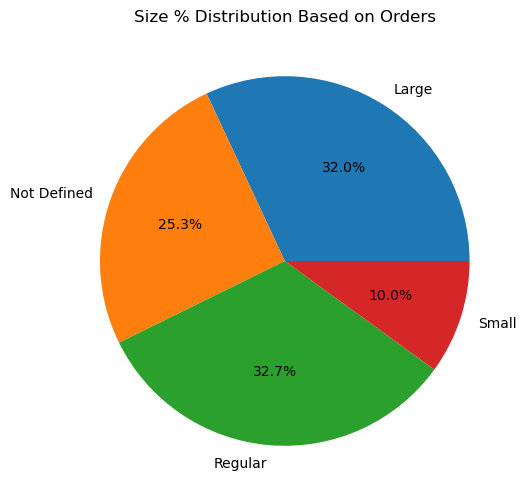

In [73]:
size_distribution = data.groupby("Size")["transaction_qty"].sum()

plt.figure(figsize=(6,6))
plt.pie(size_distribution.values, labels=size_distribution.index, autopct="%1.1f%%")
plt.title("Size % Distribution Based on Orders")
plt.show()
